In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('salary_data_cleaned.csv')

## To do:
- choose relevant columns
- generate dummy variables
- train test split
- multiple linear regression
- lasso regression
- random forest
- tune models using GridsearchCV
- test ensembles

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'is_hq', 'Age',
       'java', 'c_plus', 'python', 'PHP', 'SQL', 'html', 'CSS', 'javascript',
       'job_simplified', 'seniority', 'desc_len', 'competitors_count'],
      dtype='object')

In [7]:
df_model = df[['Rating','Size','Type of ownership','Sector','Revenue','competitors_count','job_state','is_hq','java', 'c_plus', 'python',
            'SQL', 'html', 'CSS', 'javascript','job_simplified','seniority','desc_len','avg_salary']]

In [8]:
df_model.head(2)

,Rating,Size,Type of ownership,Sector,Revenue,competitors_count,job_state,is_hq,java,c_plus,python,SQL,html,CSS,javascript,job_simplified,seniority,desc_len,avg_salary
0,4.4,51 to 200 employees,Company - Private,Business Services,$5 to $10 million (USD),0,NC,0,1,0,0,1,1,1,1,software engineer,senior,2740,111.5
1,4.6,201 to 500 employees,Company - Private,Information Technology,$100 to $500 million (USD),0,MD,0,1,1,0,1,0,0,1,software engineer,senior,6014,111.5


In [9]:
#get dummy
pd.set_option('display.max_columns',None)
df_dum = pd.get_dummies(df_model)
df_dum.head(2)

,Rating,competitors_count,is_hq,java,c_plus,python,SQL,html,CSS,javascript,desc_len,avg_salary,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Government,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,job_state_ AL,job_state_ AR,job_state_ AZ,job_state_ CA,job_state_ CO,job_state_ CT,job_state_ DC,job_state_ DE,job_state_ FL,job_state_ GA,job_state_ IA,job_state_ ID,job_state_ IL,job_state_ IN,job_state_ KS,job_state_ KY,job_state_ LA,job_state_ MA,job_state_ MD,job_state_ MI,job_state_ MN,job_state_ MO,job_state_ NC,job_state_ ND,job_state_ NE,job_state_ NH,job_state_ NJ,job_state_ NM,job_state_ NV,job_state_ NY,job_state_ OH,job_state_ OK,job_state_ OR,job_state_ PA,job_state_ PR,job_state_ RI,job_state_ SC,job_state_ TN,job_state_ TX,job_state_ UT,job_state_ VA,job_state_ WA,job_state_ WI,job_state_na,job_simplified_na,job_simplified_software engineer,seniority_junior,seniority_na,seniority_senior
0,4.4,0,0,1,0,0,1,1,1,1,2740,111.5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,4.6,0,0,1,1,0,1,0,0,1,6014,111.5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [10]:
#train test split
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary',axis=1)
y = df_dum['avg_salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Lasso Regression

In [11]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm_lasso = Lasso() #by default, alpha=1; alpha=0:LinearRegression
np.mean(cross_val_score(lm_lasso,X_train,y_train,scoring='neg_mean_absolute_error'))

-17.758145867187608

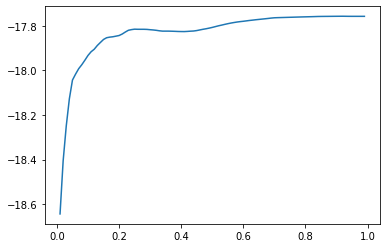

In [11]:
#try different values of alpha
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lm_lasso = Lasso(alpha=i/100) #so we're gonna do alpha from 0.1 - 10
    error.append(np.mean(cross_val_score(lm_lasso,X_train,y_train,scoring='neg_mean_absolute_error')))

plt.plot(alpha,error)

In [12]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err['error'] == max(df_err['error'])]

,alpha,error
91,0.92,-17.757753


In [13]:
lm_lasso = Lasso(alpha=0.92) #by default, alpha=1; alpha=0:LinearRegression
lm_lasso.fit(X_train,y_train)
np.mean(cross_val_score(lm_lasso,X_train,y_train,scoring='neg_mean_absolute_error'))

-17.757753184512175

## 2. Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)

np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-18.52001104197127

In [23]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [24]:
print(gs.best_score_)
print(gs.best_estimator_)

-18.04909419415312
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=280, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)


## Ensemble Approach

In [25]:
tpred_lmlasso = lm_lasso.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error
print('lasso: ', mean_absolute_error(y_test,tpred_lmlasso))
print('rf: ',mean_absolute_error(y_test,tpred_rf))

lasso:  17.357015827930436
rf:  17.927227678571427


In [27]:
#combine the models
mean_absolute_error(y_test,(tpred_lmlasso+tpred_rf)/2)

17.29703627977967